# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import numpy as np

# Loading Dataset

In [7]:
df = pd.read_csv("movies.csv")
df.head(2)

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
0,1,tt0111161,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161,"2,711,075",9.3,R,2h 22m,Drama,...,nm0001104,Frank Darabont,"nm0000175,nm0001104","Stephen King,Frank Darabont","Over the course of several years, two convicts...","ur16161013,ur15311310,ur0265899,ur16117882,ur1...","hitchcockthelegend,Sleepin_Dragon,EyeDunno,ale...","rw2284594,rw6606154,rw1221355,rw1822343,rw1288...","Some birds aren't meant to be caged.,An incred...",The Shawshank Redemption is written and direct...
1,2,tt0068646,The Godfather,1972,https://www.imdb.com/title/tt0068646,"1,882,829",9.2,R,2h 55m,"Crime,Drama",...,nm0000338,Francis Ford Coppola,"nm0701374,nm0000338","Mario Puzo,Francis Ford Coppola",The aging patriarch of an organized crime dyna...,"ur24740649,ur86182727,ur15794099,ur15311310,ur...","CalRhys,andrewburgereviews,gogoschka-1,Sleepin...","rw3038370,rw4756923,rw4059579,rw6568526,rw1897...","The Pinnacle Of Flawless Films!,An offer so go...",'The Godfather' is the pinnacle of flawless fi...


# Inspecting the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            250 non-null    int64  
 1   movie_id        250 non-null    object 
 2   title           250 non-null    object 
 3   year            250 non-null    int64  
 4   link            250 non-null    object 
 5   imbd_votes      250 non-null    object 
 6   imbd_rating     250 non-null    float64
 7   certificate     249 non-null    object 
 8   duration        250 non-null    object 
 9   genre           250 non-null    object 
 10  cast_id         250 non-null    object 
 11  cast_name       250 non-null    object 
 12  director_id     250 non-null    object 
 13  director_name   250 non-null    object 
 14  writer_id       250 non-null    object 
 15  writer_name     250 non-null    object 
 16  storyline       250 non-null    object 
 17  user_id         250 non-null    obj

In [4]:
df.describe()

,rank,year,imbd_rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.306800
std,72.312977,25.125356,0.229006
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


In [5]:
df.isnull().sum()

rank              0
movie_id          0
title             0
year              0
link              0
imbd_votes        0
imbd_rating       0
certificate       1
duration          0
genre             0
cast_id           0
cast_name         0
director_id       0
director_name     0
writer_id         0
writer_name       0
storyline         0
user_id           0
user_name         0
review_id         0
review_title      0
review_content    0
dtype: int64

# Data Cleaning & Processing

In [14]:
df = df.drop(["certificate",'director_id','writer_id','user_id','user_name','review_id','review_title','storyline','cast_id','cast_name','review_content',],axis = 1)

In [9]:
df.rename(columns = {"imbd_votes":"imdb_votes","imbd_rating":"imdb_rating"},inplace = True)
df.head(2)

,rank,movie_id,title,year,link,imdb_votes,imdb_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
0,1,tt0111161,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161,"2,711,075",9.3,R,2h 22m,Drama,...,nm0001104,Frank Darabont,"nm0000175,nm0001104","Stephen King,Frank Darabont","Over the course of several years, two convicts...","ur16161013,ur15311310,ur0265899,ur16117882,ur1...","hitchcockthelegend,Sleepin_Dragon,EyeDunno,ale...","rw2284594,rw6606154,rw1221355,rw1822343,rw1288...","Some birds aren't meant to be caged.,An incred...",The Shawshank Redemption is written and direct...
1,2,tt0068646,The Godfather,1972,https://www.imdb.com/title/tt0068646,"1,882,829",9.2,R,2h 55m,"Crime,Drama",...,nm0000338,Francis Ford Coppola,"nm0701374,nm0000338","Mario Puzo,Francis Ford Coppola",The aging patriarch of an organized crime dyna...,"ur24740649,ur86182727,ur15794099,ur15311310,ur...","CalRhys,andrewburgereviews,gogoschka-1,Sleepin...","rw3038370,rw4756923,rw4059579,rw6568526,rw1897...","The Pinnacle Of Flawless Films!,An offer so go...",'The Godfather' is the pinnacle of flawless fi...


In [15]:
df["imdb_votes"] = df["imdb_votes"].str.replace(",","").astype(int)
df.head(2)

,rank,movie_id,title,year,link,imdb_votes,imdb_rating,duration,genre,director_name,writer_name
0,1,tt0111161,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161,2711075,9.3,2h 22m,Drama,Frank Darabont,"Stephen King,Frank Darabont"
1,2,tt0068646,The Godfather,1972,https://www.imdb.com/title/tt0068646,1882829,9.2,2h 55m,"Crime,Drama",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"


In [16]:
df["Main_genre"] = df["genre"].str.split(',').str[0]
df.head(2)

,rank,movie_id,title,year,link,imdb_votes,imdb_rating,duration,genre,director_name,writer_name,Main_genre
0,1,tt0111161,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161,2711075,9.3,2h 22m,Drama,Frank Darabont,"Stephen King,Frank Darabont",Drama
1,2,tt0068646,The Godfather,1972,https://www.imdb.com/title/tt0068646,1882829,9.2,2h 55m,"Crime,Drama",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola",Crime


# Data Visualization

# Q1. Top 5 movies based on number of votes.

In [17]:
gb = df.groupby("title").agg({"imdb_votes":"max"})
a = gb.sort_values(by = "imdb_votes", ascending = False)
top_movies = a.head()
top_movies

,imdb_votes
title,
The Shawshank Redemption,2711075
The Dark Knight,2684051
Inception,2381879
Fight Club,2154995
Forrest Gump,2106590


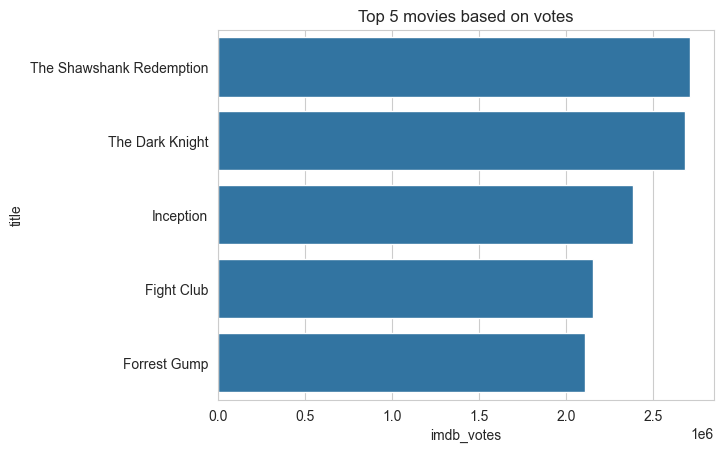

In [18]:
sns.set_style(style = 'whitegrid')
sns.barplot(data = top_movies, y= "title", x = "imdb_votes")
mp.title("Top 5 movies based on votes")
mp.show()

# Q2. Find out which movie has the maximum number of votes and which genre it belongs to and its duration.

In [21]:
a = df["imdb_votes"].idxmax()
print(df.loc[a,"title"],"has maximum number of votes.","\nIt's Genre: ",df.loc[a,"genre"],"\nIt's duration: ",df.loc[a,"duration"])

The Shawshank Redemption has maximum number of votes. 
It's Genre:  Drama 
It's duration:  2h 22m


# Q3. Find out which movie has the minimum number of votes and which genre it belongs to and its duration.

In [22]:
a = df["imdb_votes"].idxmin()
print(df.loc[a,"title"],"has minimum number of votes.","\nIt's Genre: ",df.loc[a,"genre"],"\nIt's duration: ",df.loc[a,"duration"])

Dersu Uzala has minimum number of votes. 
It's Genre:  Adventure,Biography,Drama 
It's duration:  2h 22m


# Q4. Find out each genre which has maximum number of votes(Top 10).

In [23]:
gb = df.groupby("Main_genre").agg({"imdb_votes":"max"})
a = gb.sort_values(by = "imdb_votes", ascending = False)
a

,imdb_votes
Main_genre,
Drama,2711075
Action,2684051
Crime,2081489
Adventure,1870060
Biography,1437576
Mystery,1338496
Animation,1129098
Comedy,1100115
Horror,892980


C:\Users\Ishank\AppData\Local\Temp\ipykernel_3716\3043982338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,x = "Main_genre", y = "imdb_votes",palette = "viridis")


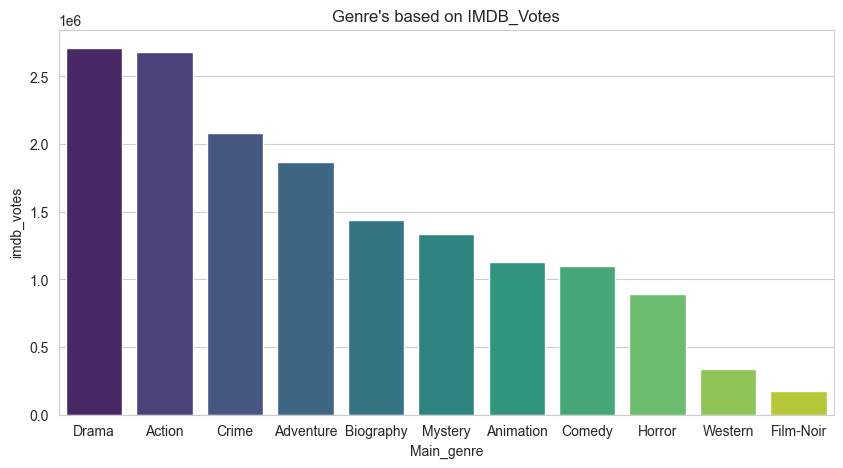

In [24]:
mp.figure(figsize = [10,5])
sns.barplot(data=a,x = "Main_genre", y = "imdb_votes",palette = "viridis")
mp.title("Genre's based on IMDB_Votes") 
mp.show()

# Q5. Find out top 5 genre which has maximum number of movies

In [25]:
a = df["Main_genre"].value_counts()
genre = a.head()
genre

Main_genre
Drama        68
Action       45
Crime        35
Biography    23
Comedy       23
Name: count, dtype: int64

C:\Users\Ishank\AppData\Local\Temp\ipykernel_3716\1424478338.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = genre, palette = "Dark2")


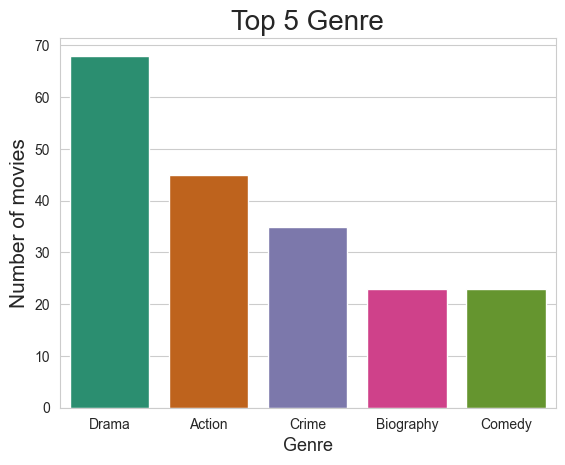

In [26]:
sns.barplot(data = genre, palette = "Dark2")
mp.xlabel("Genre", fontsize = 13)
mp.ylabel("Number of movies", fontsize = 15)
mp.title("Top 5 Genre", fontsize = 20)
mp.show()

# Q6. In which year most movies released? (Top 10)

In [28]:
a = df["year"].value_counts().head(10)
print("Maximum number of movies(8) released on 1995")
a

Maximum number of movies(8) released on 1995


year
1995    8
2004    7
2009    6
1957    6
2003    6
2019    6
1999    6
1975    5
2007    5
2011    5
Name: count, dtype: int64

C:\Users\Ishank\AppData\Local\Temp\ipykernel_3716\358942391.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= "year", order= a.index, palette = "rainbow")


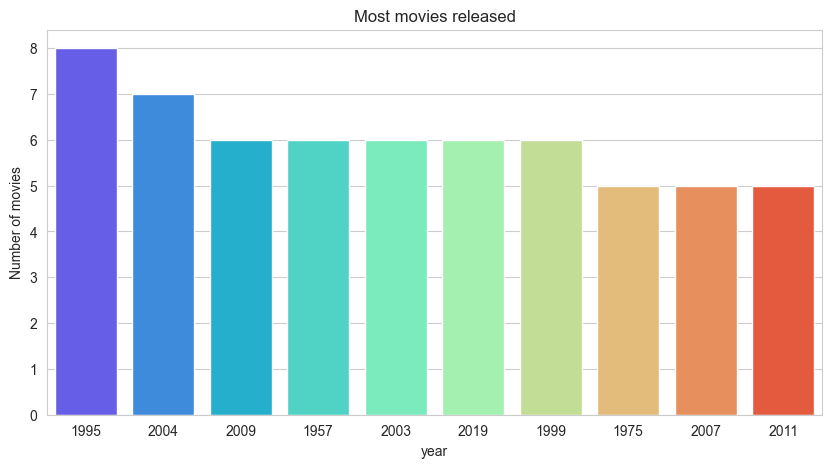

In [29]:
mp.figure(figsize = [10,5])
sns.countplot(data = df, x= "year", order= a.index, palette = "rainbow") 
mp.title("Most movies released")
mp.ylabel("Number of movies")
mp.show()

# Q7. Which directors have the most movies

In [31]:
a = df["director_name"].value_counts()
ax = pd.DataFrame(a.head(10))
ax

,count
director_name,
Martin Scorsese,7
Christopher Nolan,7
Steven Spielberg,7
Stanley Kubrick,7
Akira Kurosawa,7
Alfred Hitchcock,6
Billy Wilder,5
Charles Chaplin,5
Quentin Tarantino,5


C:\Users\Ishank\AppData\Local\Temp\ipykernel_3716\2436779288.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = ax, y = ax.index, x = ax['count'], palette = "Paired")


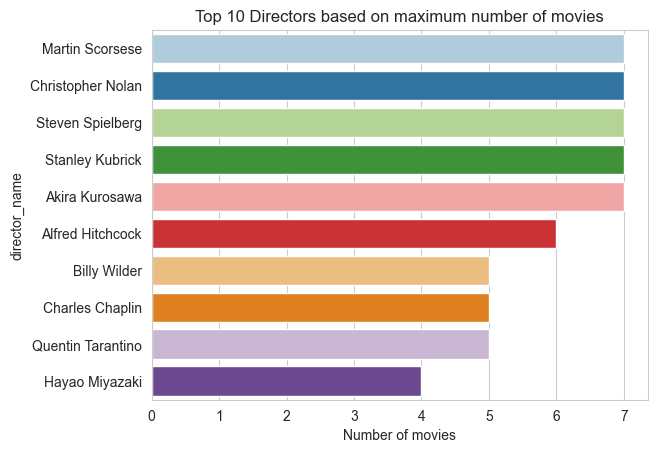

In [32]:
sns.barplot(data = ax, y = ax.index, x = ax['count'], palette = "Paired")
mp.title("Top 10 Directors based on maximum number of movies")
mp.xlabel("Number of movies")
mp.show()

# Q8. Which director has produced highest rated movies on an averag ? MIN MOVIES = 4

In [33]:
gb = df.groupby("director_name").agg({"imdb_rating":"mean", "title":"count"})
a = gb.sort_values(by = ["title","imdb_rating"], ascending = False).head(11)
data = pd.DataFrame(a)
data

,imdb_rating,title
director_name,,
Christopher Nolan,8.557143,7
Steven Spielberg,8.371429,7
Stanley Kubrick,8.314286,7
Martin Scorsese,8.314286,7
Akira Kurosawa,8.300000,7
Alfred Hitchcock,8.316667,6
Quentin Tarantino,8.420000,5
Charles Chaplin,8.360000,5
Billy Wilder,8.320000,5


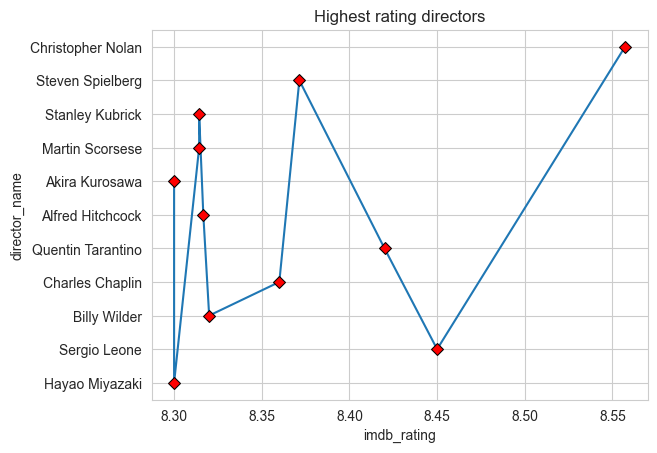

In [34]:
sns.lineplot(data = data, y= data.index, x = "imdb_rating", marker = "D",mec = "black",mfc = "red")
mp.title("Highest rating directors")
mp.show()

# Q9. What is the average duration of movies

In [35]:
def mins(duration):
    if "h" in duration and "m" in duration:
        return(int(duration.split(" ")[0].replace("h",""))*60) + int(duration.split(" ")[1].replace("m",''))
    elif "h" in duration and "m" not in duration:
        return(int(duration.replace("h",""))*60)
    elif "m" in duration and "h" not in duration:
        return(int(duration.replace("m","")))
df["minutes"]= df["duration"].apply(mins)

In [36]:
df.head()
a = df["minutes"].mean()
print("Average duration of movies: ",a, "minutes")

Average duration of movies:  129.132 minutes
